In [6]:
import pandas as pd
import numpy as np 

from sklearn.preprocessing import StandardScaler, LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [7]:

data = pd.read_csv('credit_card_fraud_dataset.csv')

In [8]:
data.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,15:35.5,4189.27,688,refund,San Antonio,0
1,2,20:35.5,2659.71,109,refund,Dallas,0
2,3,08:35.5,784.00,394,purchase,New York,0
3,4,50:35.5,3514.40,944,purchase,Philadelphia,0
4,5,51:35.5,369.07,475,purchase,Phoenix,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    19999 non-null  int64  
 1   TransactionDate  19999 non-null  object 
 2   Amount           19999 non-null  float64
 3   MerchantID       19999 non-null  int64  
 4   TransactionType  19999 non-null  object 
 5   Location         19999 non-null  object 
 6   IsFraud          19999 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 1.1+ MB


In [10]:
data.isnull().sum()

TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64

In [11]:
data.describe()

,TransactionID,Amount,MerchantID,IsFraud
count,19999.000000,19999.000000,19999.000000,19999.000000
mean,10000.000000,2497.338066,502.463373,0.010451
std,5773.358353,1445.344112,288.660926,0.101695
min,1.000000,1.070000,1.000000,0.000000
25%,5000.500000,1250.140000,254.000000,0.000000
50%,10000.000000,2490.890000,503.000000,0.000000
75%,14999.500000,3749.410000,753.000000,0.000000
max,19999.000000,4999.420000,1000.000000,1.000000


In [12]:
data = data.drop_duplicates()

In [13]:
label_encoder_type = LabelEncoder()
label_encoder_location = LabelEncoder()

data['TransactionType'] = label_encoder_type.fit_transform(data['TransactionType'])
data['Location'] = label_encoder_location.fit_transform(data['Location'])

transaction_type_mapping = dict(zip(label_encoder_type.classes_, range(len(label_encoder_type.classes_))))
location_mapping = dict(zip(label_encoder_location.classes_, range(len(label_encoder_location.classes_))))

transaction_type_inverse_mapping = {v: k for k, v in transaction_type_mapping.items()}
location_inverse_mapping = {v: k for k, v in location_mapping.items()}

In [14]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], errors='coerce')

# Extract time features
data['TransactionHour'] = data['TransactionDate'].dt.hour
data['TransactionDay'] = data['TransactionDate'].dt.day
data['TransactionMonth'] = data['TransactionDate'].dt.month

# Drop the original date column (optional)
data = data.drop(columns=['TransactionDate'])

C:\Users\naeem\AppData\Local\Temp\ipykernel_10860\841058818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], errors='coerce')


In [15]:
data.head()

,TransactionID,Amount,MerchantID,TransactionType,Location,IsFraud,TransactionHour,TransactionDay,TransactionMonth
0,1,4189.27,688,1,7,0,15.0,27.0,10.0
1,2,2659.71,109,1,1,0,20.0,27.0,10.0
2,3,784.00,394,0,4,0,8.0,27.0,10.0
3,4,3514.40,944,0,5,0,NaN,NaN,NaN
4,5,369.07,475,0,6,0,NaN,NaN,NaN


In [16]:
data.describe()

,TransactionID,Amount,MerchantID,TransactionType,Location,IsFraud,TransactionHour,TransactionDay,TransactionMonth
count,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,7873.000000,7873.0,7873.0
mean,10000.000000,2497.338066,502.463373,0.497675,4.477524,0.010451,11.488505,27.0,10.0
std,5773.358353,1445.344112,288.660926,0.500007,2.874301,0.101695,6.901834,0.0,0.0
min,1.000000,1.070000,1.000000,0.000000,0.000000,0.000000,0.000000,27.0,10.0
25%,5000.500000,1250.140000,254.000000,0.000000,2.000000,0.000000,6.000000,27.0,10.0
50%,10000.000000,2490.890000,503.000000,0.000000,4.000000,0.000000,12.000000,27.0,10.0
75%,14999.500000,3749.410000,753.000000,1.000000,7.000000,0.000000,17.000000,27.0,10.0
max,19999.000000,4999.420000,1000.000000,1.000000,9.000000,1.000000,23.000000,27.0,10.0


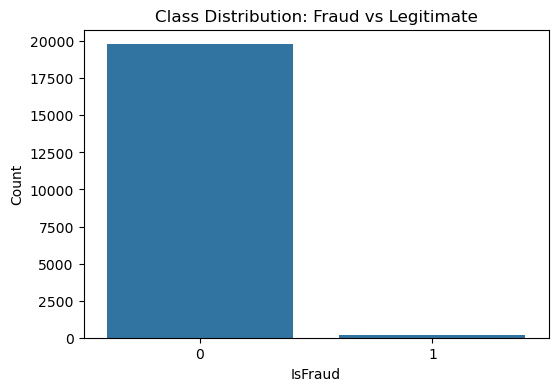

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x='IsFraud', data=data)
plt.title('Class Distribution: Fraud vs Legitimate')
plt.xlabel('IsFraud')
plt.ylabel('Count')
plt.show()

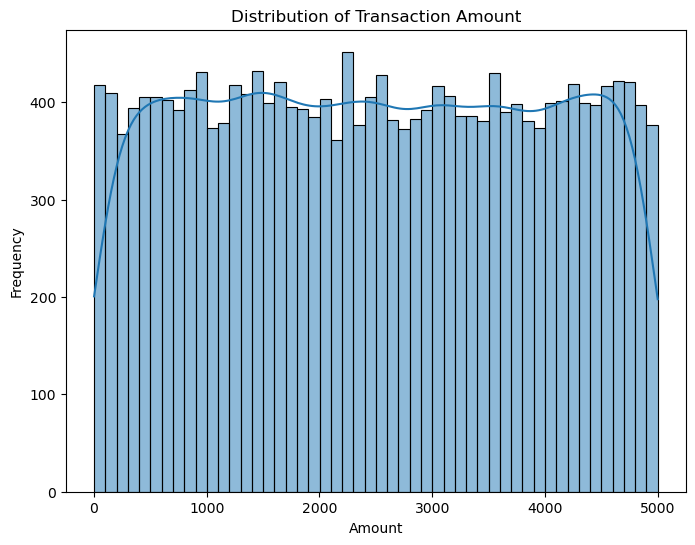

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

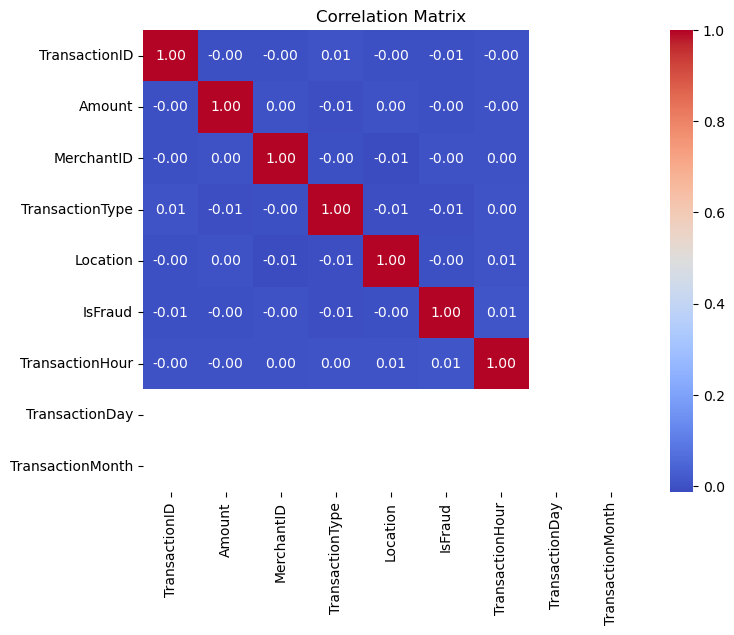

In [19]:
correlation = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

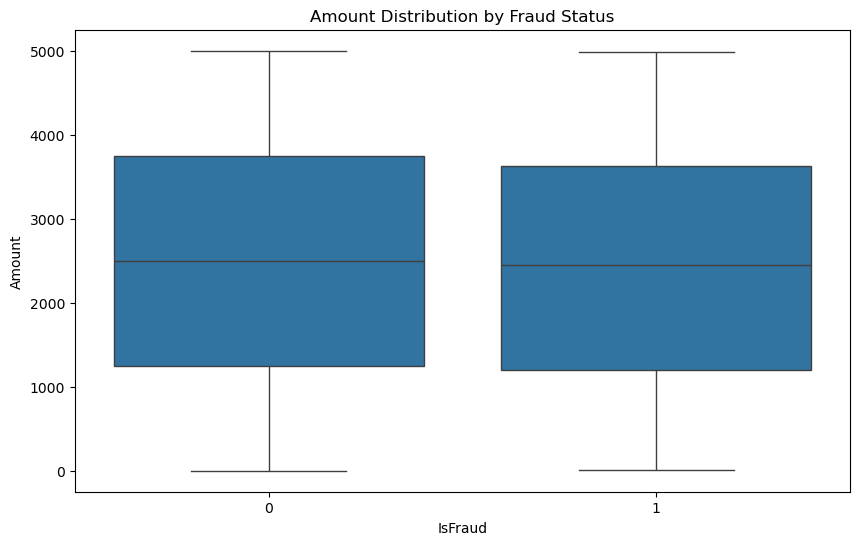

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsFraud', y='Amount', data=data)
plt.title('Amount Distribution by Fraud Status')
plt.xlabel('IsFraud')
plt.ylabel('Amount')
plt.show()

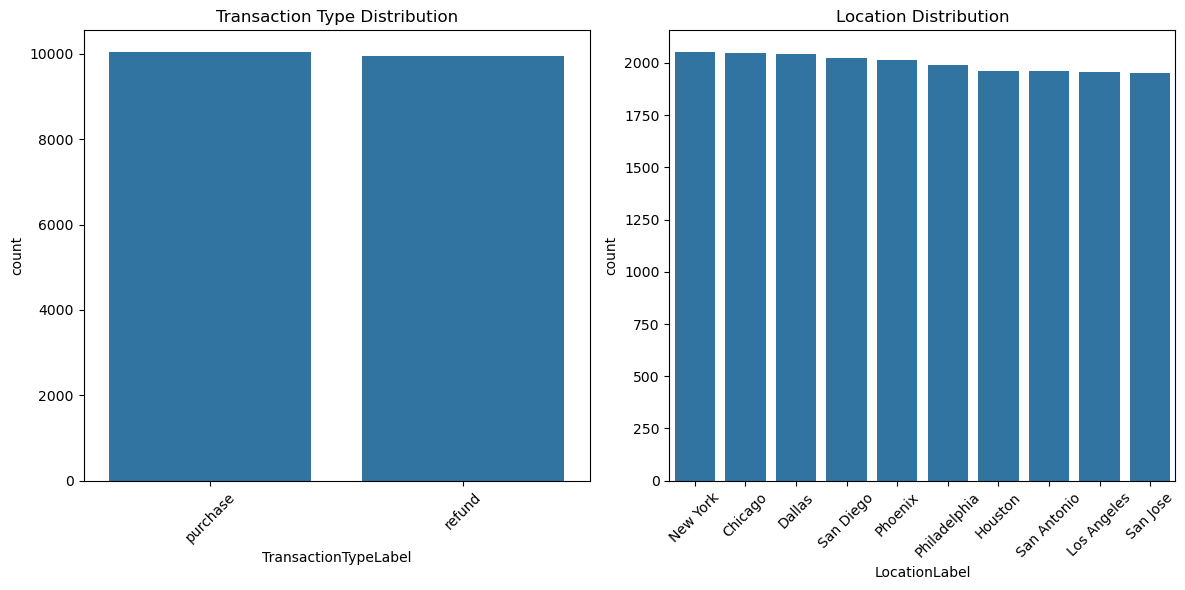

In [21]:
data['TransactionTypeLabel'] = data['TransactionType'].map(transaction_type_inverse_mapping)
data['LocationLabel'] = data['Location'].map(location_inverse_mapping)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='TransactionTypeLabel', data=data, order=data['TransactionTypeLabel'].value_counts().index)
plt.title('Transaction Type Distribution')
plt.xticks(rotation=45) 

plt.subplot(1, 2, 2)
sns.countplot(x='LocationLabel', data=data, order=data['LocationLabel'].value_counts().index)
plt.title('Location Distribution')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

C:\Users\naeem\AppData\Local\Temp\ipykernel_10860\2662000288.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LocationLabel', y='FraudCount', data=fraud_by_location, palette='viridis')
C:\Users\naeem\AppData\Local\Temp\ipykernel_10860\2662000288.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LocationLabel', y='TotalTransactions', data=total_transactions_by_location, palette='coolwarm')


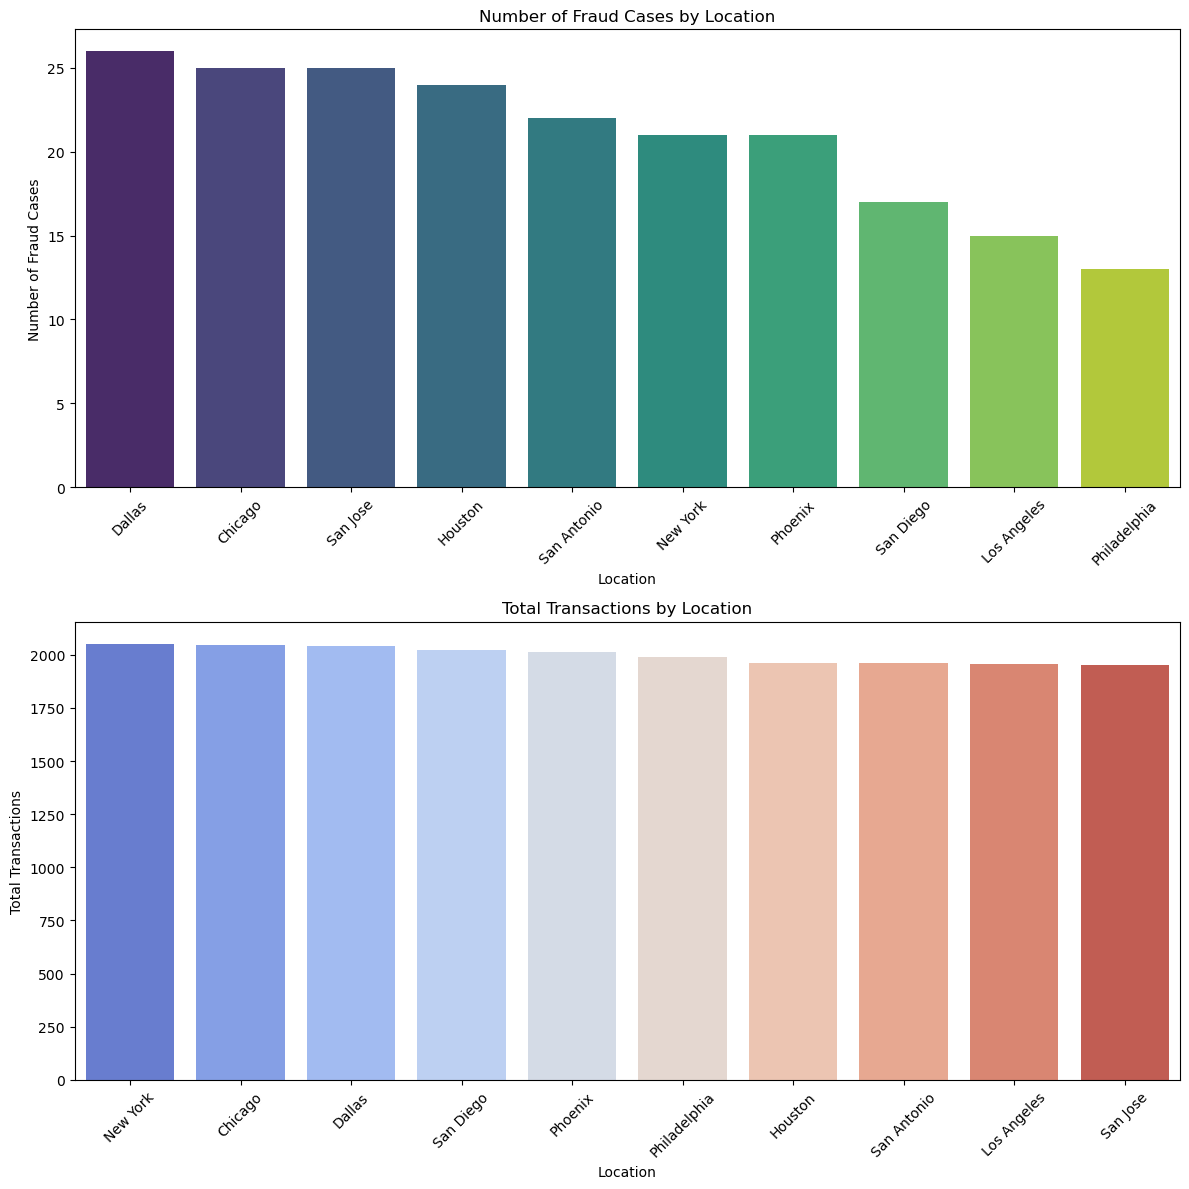

In [22]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)

fraud_by_location = data[data['IsFraud'] == 1].groupby('LocationLabel').size().reset_index(name='FraudCount')

fraud_by_location = fraud_by_location.sort_values(by='FraudCount', ascending=False)

# Create the barplot for fraud cases
sns.barplot(x='LocationLabel', y='FraudCount', data=fraud_by_location, palette='viridis')
plt.title('Number of Fraud Cases by Location')
plt.xlabel('Location')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)

total_transactions_by_location = data.groupby('LocationLabel').size().reset_index(name='TotalTransactions')

total_transactions_by_location = total_transactions_by_location.sort_values(by='TotalTransactions', ascending=False)

sns.barplot(x='LocationLabel', y='TotalTransactions', data=total_transactions_by_location, palette='coolwarm')
plt.title('Total Transactions by Location')
plt.xlabel('Location')
plt.ylabel('Total Transactions')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Axes: xlabel='Amount', ylabel='TransactionHour'>

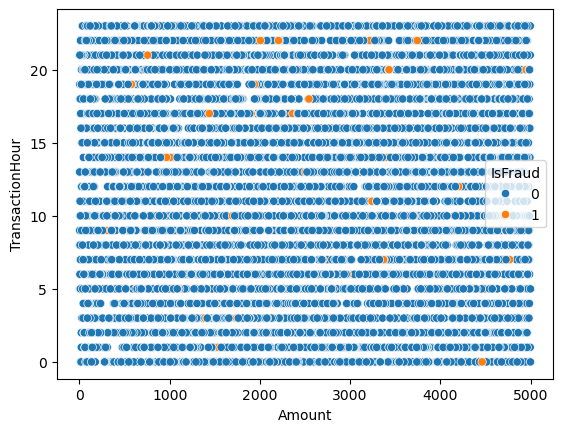

In [23]:
sns.scatterplot(x='Amount', y='TransactionHour', hue='IsFraud', data=data)

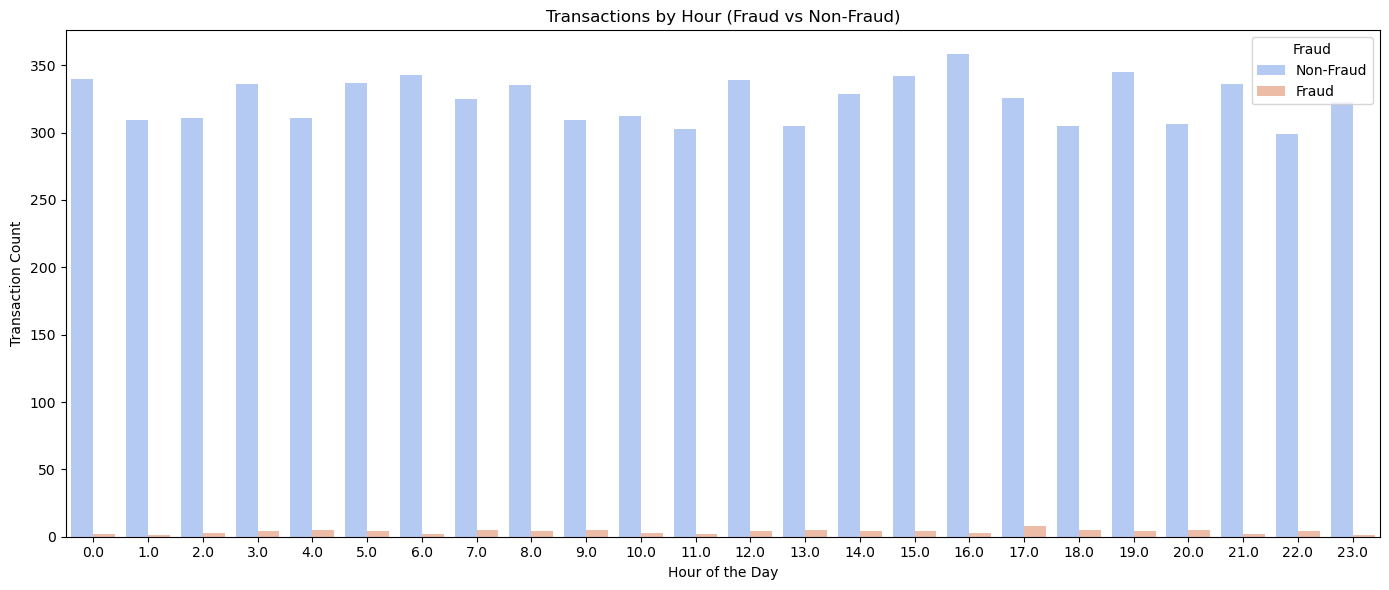

In [24]:
plt.figure(figsize=(14, 6))

sns.countplot(x='TransactionHour', hue='IsFraud', data=data, palette='coolwarm')
plt.title('Transactions by Hour (Fraud vs Non-Fraud)')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Count')
plt.legend(title='Fraud', loc='upper right', labels=['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

C:\Users\naeem\AppData\Local\Temp\ipykernel_10860\1370294751.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IsFraud', y='Amount', data=data, palette='muted')


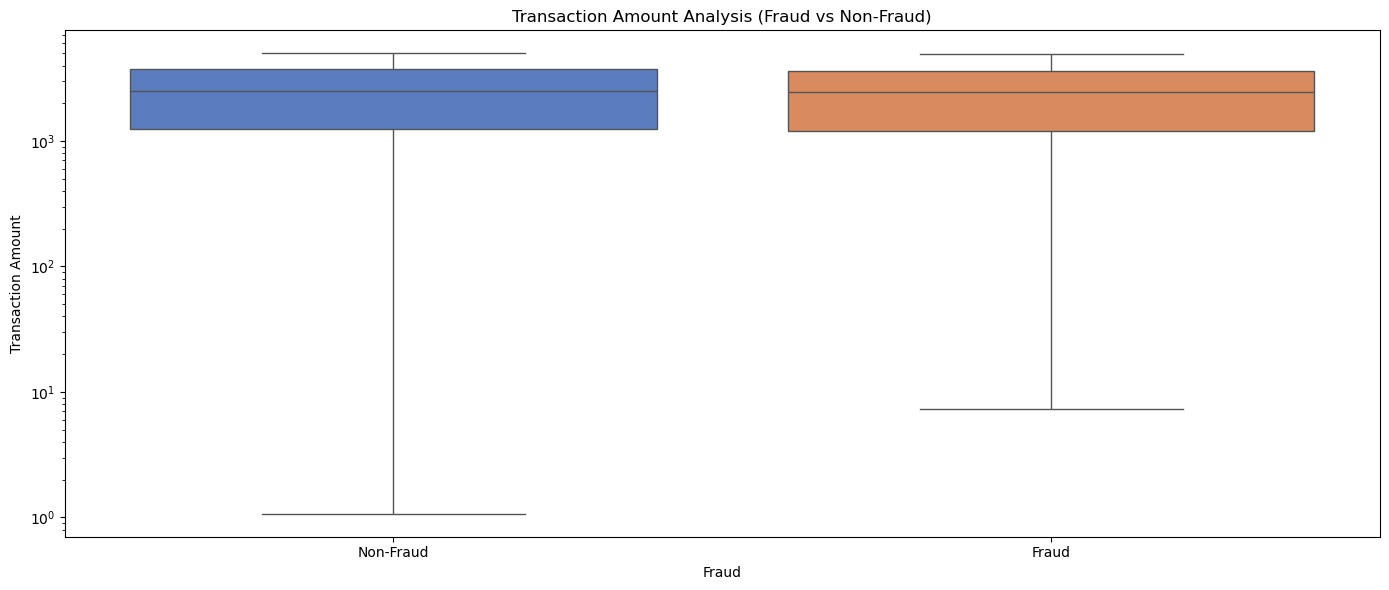

In [25]:
plt.figure(figsize=(14, 6))

sns.boxplot(x='IsFraud', y='Amount', data=data, palette='muted')
plt.title('Transaction Amount Analysis (Fraud vs Non-Fraud)')
plt.xlabel('Fraud')
plt.ylabel('Transaction Amount')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.yscale('log')  
plt.tight_layout()
plt.show()

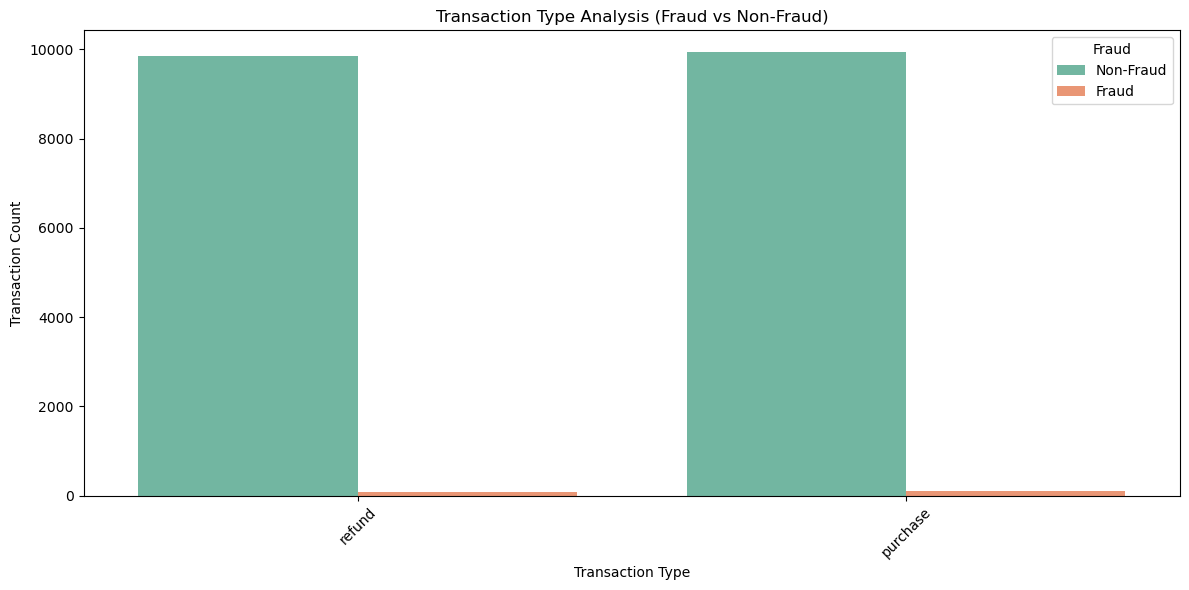

In [26]:
plt.figure(figsize=(12, 6))

sns.countplot(x='TransactionTypeLabel', hue='IsFraud', data=data, palette='Set2')
plt.title('Transaction Type Analysis (Fraud vs Non-Fraud)')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Count')
plt.legend(title='Fraud', loc='upper right', labels=['Non-Fraud', 'Fraud'])
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

C:\Users\naeem\AppData\Local\Temp\ipykernel_10860\535847870.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TransactionTypeLabel', data=fraud_data, palette='Set2')


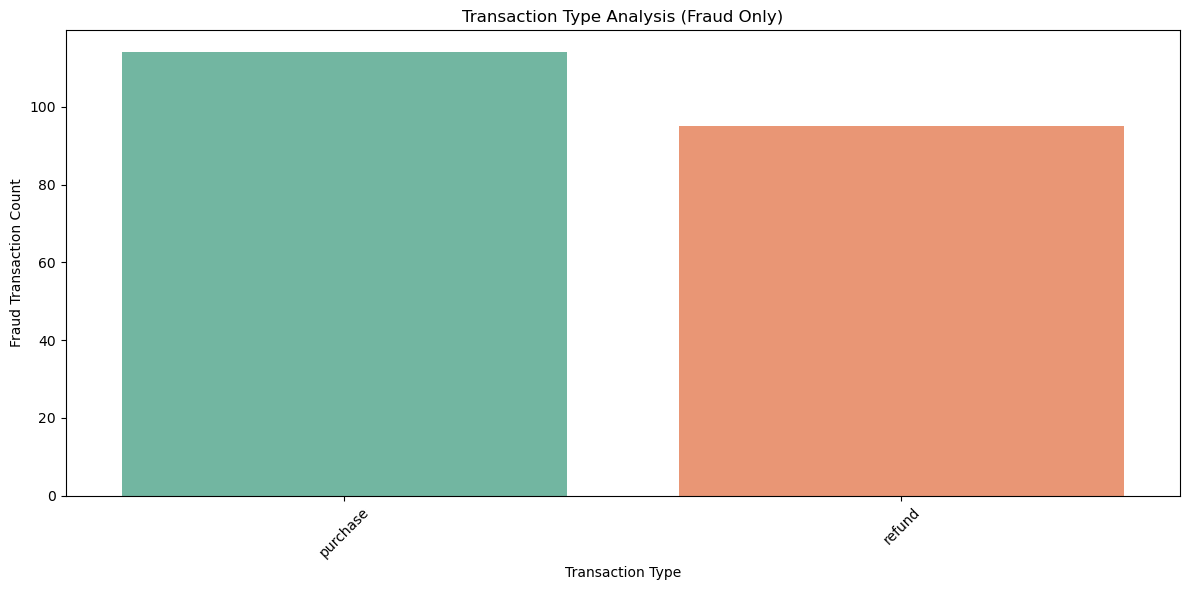

In [27]:
plt.figure(figsize=(12, 6))

fraud_data = data[data['IsFraud'] == 1]

sns.countplot(x='TransactionTypeLabel', data=fraud_data, palette='Set2')
plt.title('Transaction Type Analysis (Fraud Only)')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Transaction Count')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()
plt.show()

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionID         19999 non-null  int64  
 1   Amount                19999 non-null  float64
 2   MerchantID            19999 non-null  int64  
 3   TransactionType       19999 non-null  int64  
 4   Location              19999 non-null  int64  
 5   IsFraud               19999 non-null  int64  
 6   TransactionHour       7873 non-null   float64
 7   TransactionDay        7873 non-null   float64
 8   TransactionMonth      7873 non-null   float64
 9   TransactionTypeLabel  19999 non-null  object 
 10  LocationLabel         19999 non-null  object 
dtypes: float64(4), int64(5), object(2)
memory usage: 1.7+ MB


In [29]:
data_model = data.drop(columns=['TransactionID', 'TransactionTypeLabel', 'LocationLabel', 'MerchantID'])

X = data_model.drop(columns=['IsFraud'])
y = data_model['IsFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [30]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(strategy='mean')  # or 'most_frequent' for categorical
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression


models = {
    "Logistic Regression": LogisticRegression(random_state=42),
  
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    models[model_name] = model  


C:\Users\naeem\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\naeem\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\naeem\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Logistic Regression Accuracy: 0.9895

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      5937
           1       0.00      0.00      0.00        63

    accuracy                           0.99      6000
   macro avg       0.49      0.50      0.50      6000
weighted avg       0.98      0.99      0.98      6000



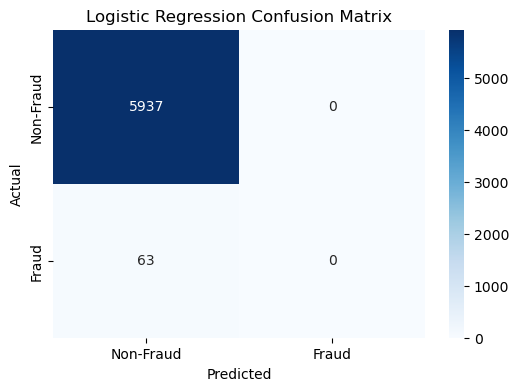

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluation dictionary to store results
evaluation_results = {}

# Evaluasi setiap model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Hitung accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Classification report
    clf_report = classification_report(y_test, y_pred)
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store results in dictionary
    evaluation_results[model_name] = {
        "accuracy": accuracy,
        "classification_report": clf_report,
        "confusion_matrix": conf_matrix
    }
    
    # Print evaluation for each model
    print(f"\n{model_name} Accuracy: {accuracy}")
    print(f"\n{model_name} Classification Report:\n", clf_report)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionID         19999 non-null  int64  
 1   Amount                19999 non-null  float64
 2   MerchantID            19999 non-null  int64  
 3   TransactionType       19999 non-null  int64  
 4   Location              19999 non-null  int64  
 5   IsFraud               19999 non-null  int64  
 6   TransactionHour       7873 non-null   float64
 7   TransactionDay        7873 non-null   float64
 8   TransactionMonth      7873 non-null   float64
 9   TransactionTypeLabel  19999 non-null  object 
 10  LocationLabel         19999 non-null  object 
dtypes: float64(4), int64(5), object(2)
memory usage: 1.7+ MB


In [35]:
data = data.drop(['TransactionID', 'TransactionTypeLabel', 'LocationLabel'], axis=1)

In [36]:
X = data.drop('IsFraud', axis=1)
y = data['IsFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # use 'most_frequent' if you have categorical columns
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [38]:
# Print the count before SMOTE
print("Before SMOTE:")
print(f"Train Data - Positive class (Fraud): {y_train.sum()} | Negative class (Non-Fraud): {(y_train == 0).sum()}")
print(f"Test Data - Positive class (Fraud): {y_test.sum()} | Negative class (Non-Fraud): {(y_test == 0).sum()}")

Before SMOTE:
Train Data - Positive class (Fraud): 170 | Negative class (Non-Fraud): 15829
Test Data - Positive class (Fraud): 39 | Negative class (Non-Fraud): 3961


In [39]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_imputed, y_train)

In [40]:
# Print the count after SMOTE
print("\nAfter SMOTE (Training Data):")
print(f"Train Data - Positive class (Fraud): {y_train_res.sum()} | Negative class (Non-Fraud): {(y_train_res == 0).sum()}")
print(f"Train Data Shape: {X_train_res.shape}")

print("\nTest Data (No Change):")
print(f"Test Data - Positive class (Fraud): {y_test.sum()} | Negative class (Non-Fraud): {(y_test == 0).sum()}")
print(f"Test Data Shape: {X_test.shape}")


After SMOTE (Training Data):
Train Data - Positive class (Fraud): 15829 | Negative class (Non-Fraud): 15829
Train Data Shape: (31658, 7)

Test Data (No Change):
Test Data - Positive class (Fraud): 39 | Negative class (Non-Fraud): 3961
Test Data Shape: (4000, 7)


In [41]:
from sklearn.impute import SimpleImputer

# Create the imputer (you can also use 'median' or 'most_frequent')
imputer = SimpleImputer(strategy='mean')

# Fit on training data, transform both
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [42]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [43]:
for model_name, model in models.items():
    model.fit(X_train_res, y_train_res)
    models[model_name] = model  


Logistic Regression Accuracy: 0.5325

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.53      0.69      3961
           1       0.01      0.33      0.01        39

    accuracy                           0.53      4000
   macro avg       0.50      0.43      0.35      4000
weighted avg       0.98      0.53      0.69      4000



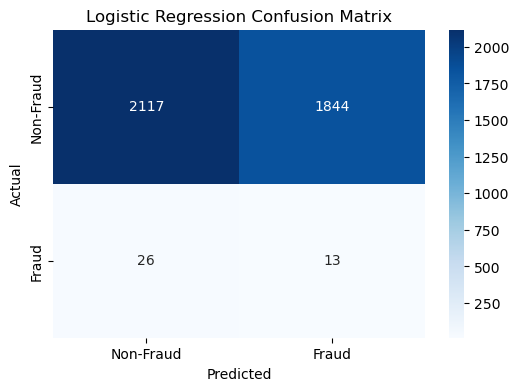

In [44]:
# Evaluation dictionary to store results
evaluation_results = {}

# Evaluasi setiap model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Hitung accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Classification report
    clf_report = classification_report(y_test, y_pred)
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store results in dictionary
    evaluation_results[model_name] = {
        "accuracy": accuracy,
        "classification_report": clf_report,
        "confusion_matrix": conf_matrix
    }
    
    # Print evaluation for each model
    print(f"\n{model_name} Accuracy: {accuracy}")
    print(f"\n{model_name} Classification Report:\n", clf_report)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


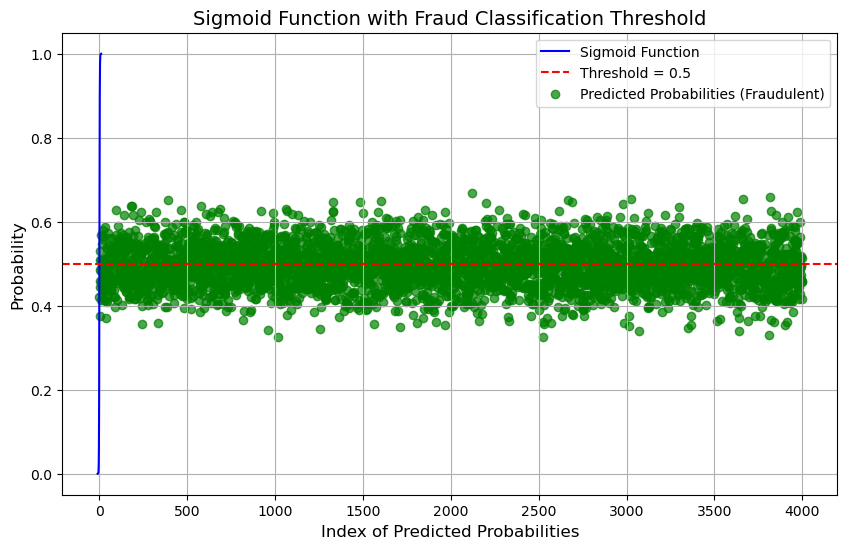

In [45]:
import numpy as np

# Get the predicted probabilities for the positive class (Fraudulent)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Define a sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate a range of values for the sigmoid curve
x_values = np.linspace(-10, 10, 200)
y_values = sigmoid(x_values)

# Set a threshold for classification (commonly 0.5)
threshold = 0.5

# Plot the sigmoid curve
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label="Sigmoid Function", color="blue")

# Add the threshold line
plt.axhline(y=threshold, color='red', linestyle='--', label=f"Threshold = {threshold}")

# Scatter plot for the predicted probabilities
plt.scatter(range(len(y_pred_prob)), y_pred_prob, alpha=0.7, label="Predicted Probabilities (Fraudulent)", color="green")

# Add titles and labels
plt.title("Sigmoid Function with Fraud Classification Threshold", fontsize=14)
plt.xlabel("Index of Predicted Probabilities", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
